In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns

In [7]:
run = "scalePop_PPs_CVAP_one_phase_statewide_1"
VTDtoHD = pd.read_csv("../resources/TX_district_assignment.csv")
df = pd.read_csv(f"../final_final_testing/{run}.csv")
df = pd.read_csv(f"../final_final_testing/{run}.csv")
df = pd.merge(df, VTDtoHD, how='inner')
df = df.groupby(by="sldl358").sum()

In [8]:
df

,CNTY_x,VAP,BVAP,HVAP,TOTPOP,BPOP,HPOP,Obama,Romney,BRvotes,...,BDvotes,HDvotes,ODvotes,bvotes,hvotes,ovotes,Unnamed: 0,CD,sldl309,sldu172
sldl358,,,,,,,,,,,,,,,,,,,,,
1,20167,125927,22583,7308,122017,21901,4700,16597,44661,1057.227377,...,8406.827910,1319.728355,6910.975953,9464.055286,1625.500208,50217.646364,416932,412,103,103
2,20943,130806,7937,13027,123818,8110,7587,12532,46641,484.137747,...,3425.006939,2226.250475,6905.200458,3909.144686,2757.768559,52522.653136,457706,310,146,146
3,20647,118627,10945,23826,106197,10325,11949,12786,43741,511.799674,...,5065.094153,3263.732832,4484.652630,5576.893826,4137.953530,46806.360723,390226,464,159,492
4,12609,123603,10544,14469,116298,10267,8526,14458,42682,533.266318,...,4754.688339,2570.977642,7156.584766,5287.954656,3127.530827,48765.498000,292027,265,212,129
5,28313,120169,12833,15805,110723,13312,7452,14141,44857,860.875892,...,6026.679457,1947.798029,6189.071668,6887.555350,2417.586766,49715.860152,515601,218,345,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,10251,130817,55342,35687,97382,54229,12308,40018,10274,695.895495,...,30210.430216,3751.180208,6004.364984,30906.325711,4308.229606,15079.154137,228757,491,7446,703
147,11859,136034,50344,42441,113033,50913,24300,42872,11147,613.154659,...,27365.828810,6255.728582,9200.168443,27978.983469,7098.636036,18960.782708,253516,949,8673,667
148,9849,124150,7691,76425,87406,8169,40423,22040,15725,454.922686,...,3413.113815,10718.720500,7894.918299,3868.036501,12356.992520,21553.478324,213877,855,7252,553


In [382]:
def generate_f4(run, coc, other):
    election = run[10:]
    df = pd.read_csv(f"../fig4_data/{run}.csv")
#     df = pd.merge(df, VTDtoHD, how='inner')
    df = df.groupby(by="sldl358").sum()
    
    minority_votes = df[f"BPOP_{coc}_votes"] + df[f"BPOP_{other}_votes"] + df[f"HPOP_{coc}_votes"] + df[f"HPOP_{other}_votes"]
    white_votes = df[f"OPOP_{coc}_votes"] + df[f"OPOP_{other}_votes"]
    minority_dem_votes = df[f"BPOP_{coc}_votes"] + df[f"HPOP_{coc}_votes"]
    white_dem_votes = df[f"OPOP_{coc}_votes"] + df[f"OPOP_{coc}_votes"]
    
    minority_dem_support = minority_dem_votes / minority_votes
    white_dem_support = white_dem_votes / white_votes
    racial_voting_gap = minority_dem_support - white_dem_support
    
    plt.hist(racial_voting_gap, bins=np.arange(-0.2,.85,0.1), color="#00a878", edgecolor="blue")
#     plt.hist(racial_voting_gap, color="#00a878", edgecolor="blue")
#     plt.hist(minority_dem_votes/ minority_votes, edgecolor="black")
#     plt.grid()
    plt.show()
    return

In [567]:
def make_subplot_df(run, coc, other):
    election = run[10:]
    if election == "16P_President":
        run = "preferred_16P_President"
    df = pd.read_csv(f"../fig4_data/{run}.csv")
    df = df.groupby(by="sldl358").sum()
    minority_votes = df[f"BPOP_{coc}_votes"] + df[f"BPOP_{other}_votes"] + df[f"HPOP_{coc}_votes"] + df[f"HPOP_{other}_votes"]
    white_votes = df[f"OPOP_{coc}_votes"] + df[f"OPOP_{other}_votes"]
    minority_dem_votes = df[f"BPOP_{coc}_votes"] + df[f"HPOP_{coc}_votes"]
    white_dem_votes = df[f"OPOP_{coc}_votes"] + df[f"OPOP_{coc}_votes"]
    
    minority_dem_support = minority_dem_votes / minority_votes
    white_dem_support = white_dem_votes / white_votes
    racial_voting_gap = minority_dem_support - white_dem_support
    return racial_voting_gap

In [559]:
original_run_dict = {
    "original_14R_US_Sen":["2014 U.S. Senate - Primary Runoff", "AlameelD_14R_US_Sen", "RogersD_14R_US_Sen"],
    "original_16P_President":["2016 U.S. President - Primary", "ClintonD_16P_President", "SandersD_16P_President"], # ugh
    "original_18P_Lt_Governor":["2018 Lt. Governor - Primary", "CooperD_18P_Lt_Governor", "CollierD_18P_Lt_Governor"], # should only be B?
    "original_12G_President":["2012 President - General", "ObamaD_12G_President", "RomneyR_12G_President"],
    "original_16G_RR_Comm_1":["2016 RR Commissioner 1 — General", "YarbroughD_16G_RR_Comm_1", "ChristianR_16G_RR_Comm_1"],
    "original_18G_Governor":["2018 Governor - General", "ValdezD_18G_Governor", "AbbottR_18G_Governor"],
    "original_18G_Comptroller":["2018 Comptroller - General", "ChevalierD_18G_Comptroller", "HegarR_18G_Comptroller"],
    "original_18G_Lt_Governor":["2018 Lt. Governor - General", "CollierD_18G_Lt_Governor", "PatrickR_18G_Lt_Governor"],
    "original_18G_Land_Comm":["2018 Land Commissioner - General", "SuazoD_18G_Land_Comm", "BushR_18G_Land_Comm"]
}

preferred_run_dict = {
    "preferred_14R_US_Sen":["2014 U.S. Senate - Primary Runoff", "AlameelD_14R_US_Sen", "RogersD_14R_US_Sen"],
    "preferred_16P_President":["2016 U.S. President - Primary", "ClintonD_16P_President", "SandersD_16P_President"], # ugh
    "preferred_18P_Lt_Governor":["2018 Lt. Governor - Primary", "CooperD_18P_Lt_Governor", "CollierD_18P_Lt_Governor"], # should only be B?
    "preferred_12G_President":["2012 President - General", "ObamaD_12G_President", "RomneyR_12G_President"],
    "preferred_16G_RR_Comm_1":["2016 RR Commissioner 1 — General", "YarbroughD_16G_RR_Comm_1", "ChristianR_16G_RR_Comm_1"],
    "preferred_18G_Governor":["2018 Governor - General", "ValdezD_18G_Governor", "AbbottR_18G_Governor"],
    "preferred_18G_Comptroller":["2018 Comptroller - General", "ChevalierD_18G_Comptroller", "HegarR_18G_Comptroller"],
    "preferred_18G_Lt_Governor":["2018 Lt. Governor - General", "CollierD_18G_Lt_Governor", "PatrickR_18G_Lt_Governor"],
    "preferred_18G_Land_Comm":["2018 Land Commissioner - General", "SuazoD_18G_Land_Comm", "BushR_18G_Land_Comm"]
}

In [564]:
def make_full_f4(run_dict):
    fig, ax = plt.subplots(3,3, figsize=(12,8))
    bins = np.arange(-0.2,0.85,0.1)
    bins = np.arange(-1,1, 0.2)
    
    runs = list(run_dict.keys())
    
    k = 0
    for i in range(3):
        for j in range(3):
            df = make_subplot_df(runs[k], run_dict[runs[k]][1], run_dict[runs[k]][2])
            title = run_dict[runs[k]][0]
            if "Primary" in title:
                color = "#8989fe"
            else:
                color = "#00a878"
            ax[i][j].hist(df, bins=bins, color=color, edgecolor="blue")
            ax[i][j].set_xlabel(title)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['right'].set_visible(False)
            if j == 0:
                ax[i][j].set_ylabel("# House Districts")
            k += 1
            
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
            
    plt.show()
    return

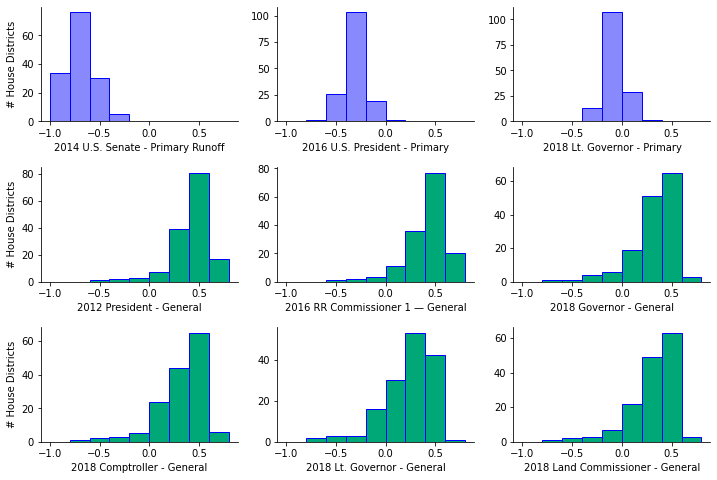

In [566]:
make_full_f4(original_run_dict)

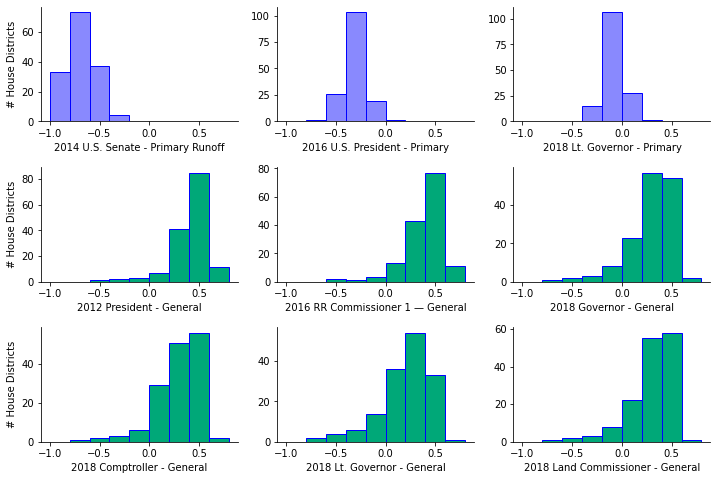

In [568]:
make_full_f4(preferred_run_dict)

In [5]:
def compare_runs(run1, run2):
    df1 = pd.read_csv(f"../final_final_testing/{run1}.csv")
    df2 = pd.read_csv(f"../final_final_testing/{run2}.csv")


#     fig, ax = plt.subplots(figsize=(8,8))

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(4,4)

    x = df1["BDvotes"] / (df1["BDvotes"] + df1["BRvotes"])
    y = df2["BDvotes"] / (df2["BDvotes"] + df2["BRvotes"])
    x_pop_weighted = df1["TOTPOP"] * x
    y_pop_weighted = df2["TOTPOP"] * y
#     print(x_pop_weighted)
    print(f"{run1} mean precinct Black Obama support = = {np.mean(x), np.std(x)}")
    print(f"{run1} mean population-weighted Black Obama support = {sum(df1['BDvotes']) / (sum(df1['BDvotes']) + sum(df1['BRvotes']))}")
    print(f"{run1} mean POP-weighted Black Obama support = = {np.mean(x_pop_weighted), np.std(x_pop_weighted)}")
    
    print(f"{run2} mean precinct Black Obama support = = {np.mean(y), np.std(y)}")
    print(f"{run2} mean population-weighted Black Obama support = {sum(df2['BDvotes']) / (sum(df2['BDvotes']) + sum(df2['BRvotes']))}")
    print(f"{run2} mean POP-weighted Black Obama support = = {np.mean(y_pop_weighted), np.std(y_pop_weighted)}")

    
    ax_joint = fig.add_subplot(gs[0:3,1:4])
    ax_marg_x = fig.add_subplot(gs[3,1:4])
    ax_marg_y = fig.add_subplot(gs[0:3,0])
    
    ax_joint.scatter(x,y)
    ax_joint.set_xlim(0,1)
    ax_joint.set_ylim(0,1)
    
    ax_marg_x.hist(x, bins=40, color="#8cb500")
    ax_marg_x.set_xlim(0,1)
#     ax_marg_x.invert_yaxis()
    
    ax_marg_y.hist(y, bins=40, color="#d11a42", orientation="horizontal")
    ax_marg_y.set_ylim(0,1)
    ax_marg_y.set_xlim(ax_marg_x.get_ylim())
    ax_marg_y.invert_xaxis()
    
    
#     ax_marg_x.hist(y, bins=40, orientation="horizontal", color="#8cb500", density=False)
#     ax_marg_x.set_ylim(0,1)
#     ax_marg_x.invert_xaxis()
#     ax_marg_y.hist(x, bins=40, color="#d11a42", density=False)
#     ax_marg_y.set_xlim(0,1)
#     ax_marg_y.set_ylim(ax_marg_x.get_xlim())
#     ax_marg_y.invert_yaxis()
    
    plt.subplots_adjust(wspace=0.35, hspace=0.35)
    
    ax_joint.grid()
    ax_marg_x.grid(axis='x')
    ax_marg_y.grid(axis='y')
    
    for ax in [ax_marg_x, ax_marg_y]:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False)
        ax.tick_params(right=False)
        ax.tick_params(top=False)
        ax.tick_params(bottom=False)

#     plt.savefig("../paper_plots/statewide_vs_county_one_phase_with_hists.png", dpi=300)
    plt.show()

In [6]:
compare_runs("scalePop_PPs_CVAP_one_phase_statewide_1", "scalePop_PPs_CVAP_one_phase_1")

FileNotFoundError: [Errno 2] No such file or directory: '../final_final_testing/scalePop_PPs_CVAP_one_phase_statewide_1.csv'